<a href="https://colab.research.google.com/github/LejoFlores/geos511-land-atmosphere-interaction/blob/main/SimpleSoilMoistureModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Meteorological forcing file and parameters
met_forcing_file = './KONZ_climate_data.csv'
phi = 39.09 # Latitude at Konza Prairie Biological Station

### Time step
dt = 1

### Soil parameters
Zr = 300.00 #
n = 0.45 # Loam
theta_r = 0.05 # cm^3/cm^3, loam
theta_s = 0.45 # cm^3/cm^3, loam
Ks = 120.5 # mm/day, loam
fmax = 182.88 # mm/day, loam
eta = 4
lambda_f = 2
Kc = 0.8 # Grasses
S_star = 0.15
S_wp = 0.05

S0 = 0.3

Calculation of Extraterrestrial Radiation is from this [FAO website:](https://www.fao.org/4/x0490e/x0490e07.htm#TopOfPage)

In [ ]:
def theta2sat(theta, theta_r, theta_s):
  S_e = (theta - theta_r)/(theta_s - theta_r)
  return S_e

def sat2theta(S_e, theta_r, theta_s):
  theta = theta_r + S_e*(theta_s - theta_r)
  return theta

def drainage(S_e, Ks, eta):
  return Ks*S_e**eta

def infiltration(S_e, fmax, lambda_f, P):
  f = fmax*(1 - S_e**lambda_f)
  return np.minimum(f, P)

def ExtraterrestrialRadiation(phi,J):
  # Computes daily extraterrestrial radiation based on latitude, day of year
  phi = phi*np.pi/180.0
  d_r = 1.00011 + 0.034221*np.cos(2*np.pi*J/365)
  delta = 0.409*np.sin(2*np.pi/365*J - 1.39)
  omega_s = np.arccos(-np.tan(phi)*np.tan(delta))
  Ra = (24.0*60.0)/np.pi*0.0820*d_r*(omega_s*np.sin(phi)*np.sin(delta) + np.cos(phi)*np.cos(delta)*np.sin(omega_s))
  Ra = 0.408*Ra # Convert units from MJ/m^2/day to mm/day
  return Ra

def ET_hargreaves(T_avg, T_max, T_min, Kc, phi, J, S_star, S_wp, S_e):
  Ra = ExtraterrestrialRadiation(phi,J)
  ET0 = 0.0023*(T_avg + 17.8)*np.sqrt(T_max - T_min)*Ra
  PET = Kc*ET0

  print(S_e)
  if (S_e > S_star):
    AET = PET
  elif (S_e < S_wp):
    AET = 0.0
  else:
    AET = PET*(S_e - S_wp)/(S_star - S_wp)
  return AET


### 2. Load Meteorological Data

In [ ]:

P_neon = np.array([0, 0, 10, 9, 0, 0, 0, 0])
T_mean_neon = np.array([18, 18, 15, 15, 20, 20, 20, 20])
T_max_neon = np.array([21, 21, 18, 18, 25, 25, 25, 25])
T_min_neon = np.array([11, 11, 9, 9, 13, 13, 13, 13])
J_neon = np.array([110, 111, 112, 113, 114, 115, 116, 117])
Nt = P_neon.size

In [ ]:
S = np.zeros(Nt)
ET = np.zeros(Nt)
f = np.zeros(Nt)
L = np.zeros(Nt)

for i in np.arange(Nt):

  P = P_neon[i]
  T_avg = T_mean_neon[i]
  T_max = T_max_neon[i]
  T_min = T_min_neon[i]
  J = J_neon[i]

  if i==0:
    Sim1 = S0
  else:
    Sim1 = S[i-1]

  L[i] = drainage(Sim1, Ks, eta)
  f[i] = infiltration(Sim1, fmax, lambda_f, P)
  ET[i] = ET_hargreaves(T_avg, T_max, T_min, Kc, phi, J, S_star, S_wp, Sim1)
  S[i] = np.clip(Sim1 + dt/(n*Zr)*(f[i] - L[i] - ET[i]), 0.0, 1.0)


0.3
0.27017284567237293
0.2427004684648696
0.2938303177449452
0.3338955762488281
0.29612395486137405
0.2624529902504141
0.23128258136074326


In [ ]:
S

array([0.27017285, 0.24270047, 0.29383032, 0.33389558, 0.29612395,
       0.26245299, 0.23128258, 0.20166741])

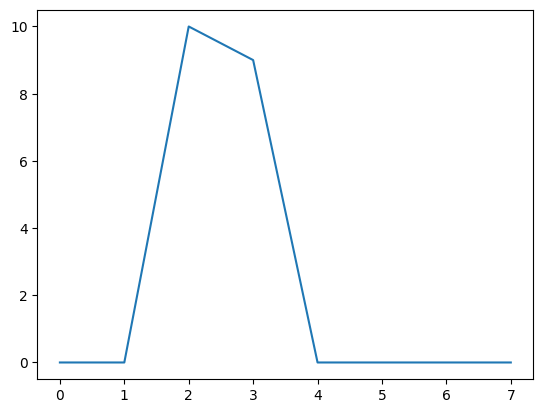

In [ ]:
plt.plot(f)

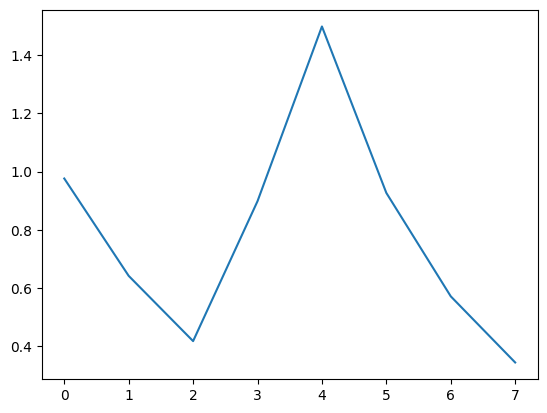

In [ ]:
plt.plot(L)

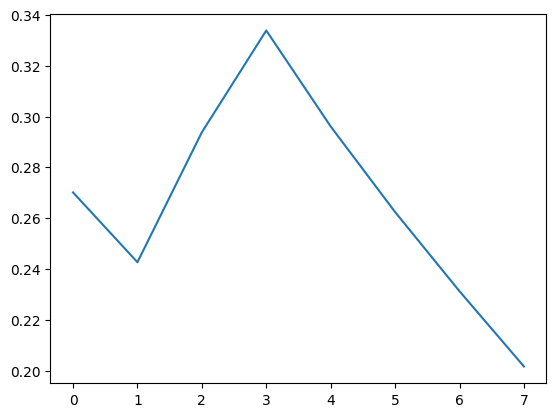

In [ ]:
plt.plot(S)

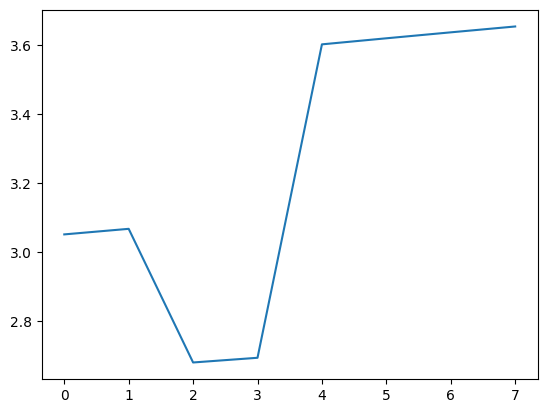

In [ ]:
plt.plot(ET)